<a href="https://colab.research.google.com/github/buenalves/ML--alura-venda-de-carros/blob/main/MachineLearning_ClassificacaocomSKLearn5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Previão da venda de um carro com base no ano do seu modelo, preço e kms rodados por ano.

In [12]:
import pandas as pd

uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [13]:
a_renomear = {'mileage_per_year': 'milhas_por_ano',
              'model_year' : 'ano_do_modelo',
              'price': 'preco',
              'sold' : 'vendido'}

# para usar o padrão, alterei os valores "yes" e "não" da coluna "vendido" ou 0 e 1
trocar = {
    'yes' : 1,
    'no' : 0
}


dados.rename(columns = a_renomear, inplace = True)
dados.vendido = dados.vendido.map(trocar)

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


Utilizar o ano_do_modelo não é interessante pois uma diferença de 2 anos entre 2000 e 1998 representa 2/2000*100, é uma porcentagem muito baixa e um scaler terá que ser usado.

É mais interessante utilizar a idade do carro

Também alterei as medidas em milhas para km.

In [14]:
from datetime import datetime

ano_atual = datetime.today().year
dados['idade_de_modelo'] = ano_atual - dados.ano_do_modelo

dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
# transformar milhas em km

dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_de_modelo,km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [15]:
# limpeza do dataset

dados = dados.drop(columns = ['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis = 1)

dados.head()

,preco,vendido,idade_de_modelo,km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [16]:
x = dados[['preco', 'idade_de_modelo', 'km_por_ano']]
y = dados.vendido

# Modelo LinearSVC

In [17]:
import numpy as np
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

print(f"Treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]}")

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)

print(f"A acuracia foi {acuracia*100:.2f} %")


Treinaremos com 7500 elementos e testaremos com 2500
A acuracia foi 46.88 %


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


A verificação da acuracia a partir da linha de base será feita através do Dummy

In [19]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier(strategy = 'stratified')
dummy_stratified.fit(treino_x,treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f"A acuracia do dummy foi {acuracia*100:.2f} %")

A acuracia do dummy foi 50.68 %


In [20]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy = 'most_frequent')
dummy_mostfrequent.fit(treino_x,treino_y)
acuracia = dummy_mostfrequent.score(teste_x, teste_y)

# acuracia = accuracy_score(teste_y, previsoes)
print(f"A acuracia do dummy foi {acuracia*100:.2f} %")

A acuracia do dummy foi 58.00 %


A acurácia do modelo é menor do que a do Dummy.

# Modelo SVC com Scaler

In [21]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

print(f"Treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]}")

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC()
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)

print(f"A acuracia foi {acuracia*100:.2f} %")


Treinaremos com 7500 elementos e testaremos com 2500
A acuracia foi 77.48 %


# Decision Tree Classifier

In [22]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
SEED = 5
np.random.seed(SEED)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y,
                                                        test_size = 0.25,
                                                        stratify = y)

print(f"Treinaremos com {treino_x.shape[0]} elementos e testaremos com {teste_x.shape[0]}")



modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)

print(f"A acuracia foi {acuracia*100:.2f} %")


Treinaremos com 7500 elementos e testaremos com 2500
A acuracia foi 79.28 %


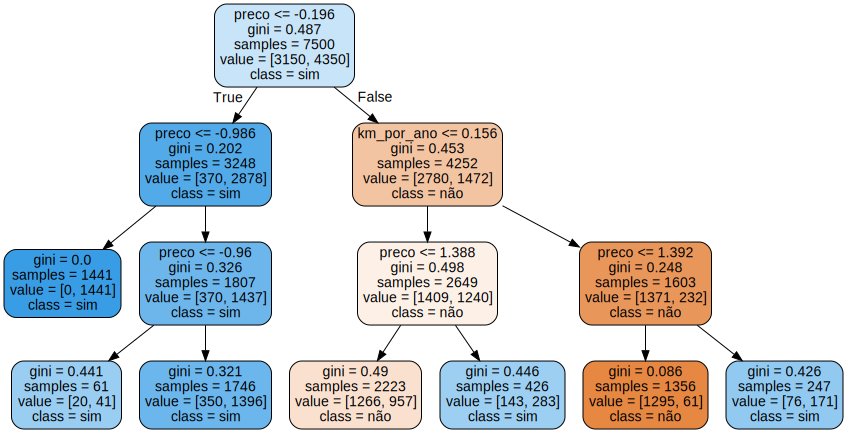

In [23]:
from sklearn.tree import export_graphviz
import graphviz

features=x.columns
dot_data = export_graphviz(modelo, out_file = None,
                           feature_names=features,
                           filled = True,
                           rounded = True,
                           class_names = ['não', 'sim'])
graphviz.Source(dot_data)